In [1]:
from pandas_datareader import data ## This import allows us to import stock price data from yahoo finance
from scipy.optimize import curve_fit ## Function to fit dataset to function

def get_stock_price(ticker, start='2016-01-01', end='2020-12-31',price_type = 'Adj Close'): ##function from lecture 1
    return data.DataReader(ticker,'yahoo',start,end)[price_type]

training_data = list(get_stock_price('GOOG')) #google price data as a list

q_eq_5 = lambda t,a,b,c,d,e,f: a + b*t + c*(t**2) + d*(t**3) + e*(t**4) + f*(t**5) #polynomial function of order 5

model = curve_fit(q_eq_5,list(range(len(training_data))),training_data) #estimated beta values (params of best fit)

ModuleNotFoundError: No module named 'pandas_datareader'

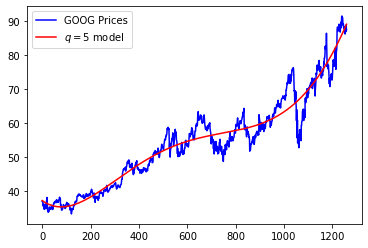

In [3]:
plt.plot(training_data,color='blue',label='GOOG Prices') #plotting stock data
plt.plot([q_eq_5(i,*model[0]) for i in range(len(training_data))],color='r',label=r'$q = 5$ model')#plotting the model
plt.legend()

Como você pode ver, esse ajuste polinomial segue a tendência dos preços do GOOG do ano novo de 2016 ao ano novo de 2021. Vamos tentar usar esse modelo para prever preços ao longo de 2021 e 2022.

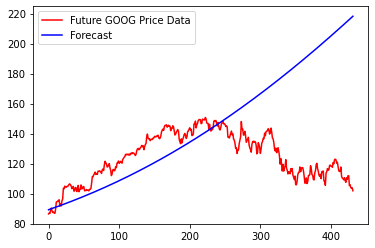

In [4]:
test_data = list(get_stock_price('GOOG', start='2021-01-01', end='2022-09-20')) ##Future data 

forecast = [q_eq_5(i,*model[0]) for i in range(len(training_data), len(training_data)+len(test_data))] #Forecast

plt.plot(test_data, color='r',label='Future GOOG Price Data')
plt.plot(forecast, color='b', label='Forecast')
plt.legend()

Como você pode ver, a previsão de tendência não é tão ruim para os primeiros ~200 dias após o período de treinamento, mas piora cada vez mais tarde. Na verdade, vamos traçar o erro ao longo do tempo

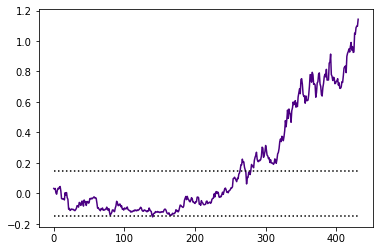

In [5]:
resid = [(forecast[i] - test_data[i])/test_data[i] for i in range(len(test_data))]

plt.plot(resid,color='indigo')
plt.plot([0.15 for i in range(len(test_data))],linestyle='dotted',color='black')
plt.plot([-0.15 for i in range(len(test_data))],linestyle='dotted', color='black')

Definindo uma tolerância de 15 por cento, podemos ver que o erro começa a divergir muito da tolerância com o passar do tempo. 

Os dados no "período de treinamento" (ou seja, 2016-2021) são conhecidos como dados _na amostra_. Como você pode ver, o modelo faz um ótimo trabalho ao estimar a tendência lá. Embora a história seja diferente para os dados _fora da amostra_ (ou seja, o "período de teste", 2021-2022).

Outro exemplo de estimativa e previsão é registrar a altura de alunos do ensino médio e ajustá-la a uma distribuição normal com $\vec{\theta} = \{\mu,\sigma^2\}$ (ou seja, estimar os parâmetros) e usar este modelo para prever a distribuição de altura nos próximos 20 anos (exemplo estranho, pois a altura tende a ser constante em períodos tão curtos).

In [ ]:
#Importing standard libraries

import numpy as np
from matplotlib import pyplot as plt 
import scipy as sci
import pandas as pd

In [33]:
#Importing standard libraries

import numpy as np
from matplotlib import pyplot as plt 
import scipy as sci
import pandas as pd
import yfinance as yf 

import warnings
warnings.filterwarnings('ignore')

In [34]:
portfolio_value = 10000 #cash given to asset manager

tickers = ["PETR4.SA", "VALE", "ITUB4.SA"
           , "TAEE11.SA", "WEGE3.SA", "AAPL",'NVDA']

weights = [0.1,0.4,0.35,0.15] #weights

start = "2017-01-02"

constituent_returns = pd.DataFrame()

for ticker in tickers:
    # Baixando os dados
    df1 = yf.download(ticker, start=start, progress = False)['Close']
    #data = df1.xs(ticker, level="Ticker", axis=1)
    # Adicionando a coluna 'Close' para o DataFrame com o nome do ticker
    constituent_returns[ticker] = df1

constituent_returns = constituent_returns.dropna()
display(constituent_returns)

,PETR4.SA,VALE,ITUB4.SA,TAEE11.SA,WEGE3.SA,AAPL,NVDA
Date,,,,,,,
2017-01-03,4.601193,4.683538,15.592239,10.001172,5.359485,26.862429,2.512663
2017-01-04,4.601193,4.683538,15.659151,9.912543,5.231074,26.832359,2.571286
2017-01-05,4.675405,4.828991,15.873309,9.959189,5.217556,26.968815,2.506012
2017-01-06,4.648688,4.648632,15.926833,9.875225,5.261486,27.269468,2.539511
2017-01-09,4.550728,4.782446,16.002691,9.697964,5.204039,27.519243,2.642472
...,...,...,...,...,...,...,...
2025-03-07,34.630001,9.900000,32.599998,33.240002,47.889999,239.070007,112.679642
2025-03-10,34.619999,9.240000,32.889999,33.520000,47.680000,227.479996,106.970161
2025-03-11,34.099998,9.400000,32.599998,33.299999,46.599998,220.839996,108.750000


Date
2017-01-04   -0.001742
2017-01-05    0.013107
2017-01-06   -0.010786
2017-01-09    0.004496
2017-01-10    0.029988
                ...   
2025-03-07    0.010135
2025-03-10   -0.023722
2025-03-11   -0.002240
2025-03-12   -0.000455
2025-03-13    0.006870
Length: 1984, dtype: float64

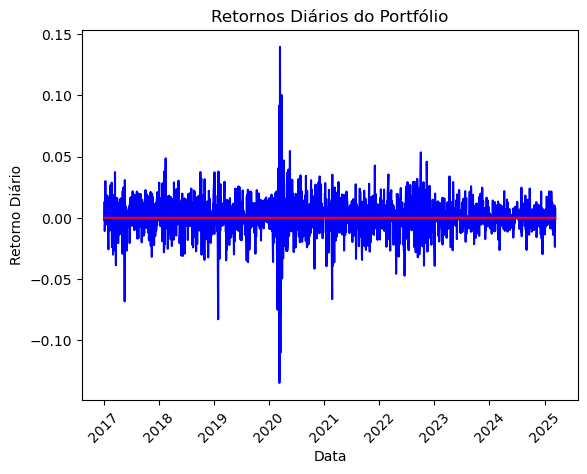

Mean Daily Portfolio Return:  0.093 %
Std. Dev Portfolio Return:  1.513 %
Total Return: 408794.17 USD


In [35]:
# Verifique se o índice do DataFrame é do tipo datetime
constituent_returns.index = pd.to_datetime(constituent_returns.index)  # Converter o índice para datetime

# Calcular os retornos diários para cada ativo
returns = constituent_returns.pct_change().dropna()  # Variação percentual diária, removendo o primeiro NaN

# Definir os pesos para o seu portfólio (exemplo)
weights = [0.2, 0.3, 0.1, 0.1, 0.1, 0.05,0.05]  # Ajuste conforme os ativos

# Calcular os retornos do portfólio
portfolio_returns = (returns * weights).sum(axis=1)

# Plotando os retornos do portfólio
plt.plot(constituent_returns.index[1:], portfolio_returns, color='blue')  # Usar o índice de data no eixo X
plt.plot(constituent_returns.index[1:], [0 for _ in range(len(portfolio_returns))], color='red')  # Linha de base

# Adicionar título e rótulos
plt.title("Retornos Diários do Portfólio")
plt.xlabel("Data")
plt.ylabel("Retorno Diário")
plt.xticks(rotation=45)  # Para que as datas fiquem legíveis

plt.show()

# Estatísticas sobre o portfólio
mean_return = np.mean(portfolio_returns)
std_dev_return = np.std(portfolio_returns)

# Supondo que 'portfolio_value' seja o valor inicial do portfólio
portfolio_value = 100000  # Exemplo de valor inicial do portfólio

# Calculando o retorno total com base na fórmula do crescimento composto
total_return = (1 + mean_return)**(252*6) * portfolio_value  # 252 dias úteis por ano, 6 anos

# Exibindo as estatísticas
print('Mean Daily Portfolio Return: ', round(mean_return * 100, 3), "%")
print('Std. Dev Portfolio Return: ', round(std_dev_return * 100, 3), "%")
print('Total Return:', round(total_return, 2), "USD")

In [38]:
training_data = portfolio_returns[:int(len(portfolio_returns)*4/6)] #training data
testing_data = portfolio_returns[int(len(portfolio_returns)*4/6):] #testing data

training_data + testing_data == portfolio_returns # sanity check

Date
2017-01-04   -0.001742
2017-01-05    0.013107
2017-01-06   -0.010786
2017-01-09    0.004496
2017-01-10    0.029988
                ...   
2022-06-09   -0.020872
2022-06-10   -0.016494
2022-06-13   -0.027302
2022-06-14    0.003020
2022-06-15    0.007240
Length: 1322, dtype: float64

Date
2017-01-04    False
2017-01-05    False
2017-01-06    False
2017-01-09    False
2017-01-10    False
              ...  
2025-03-07    False
2025-03-10    False
2025-03-11    False
2025-03-12    False
2025-03-13    False
Length: 1984, dtype: bool

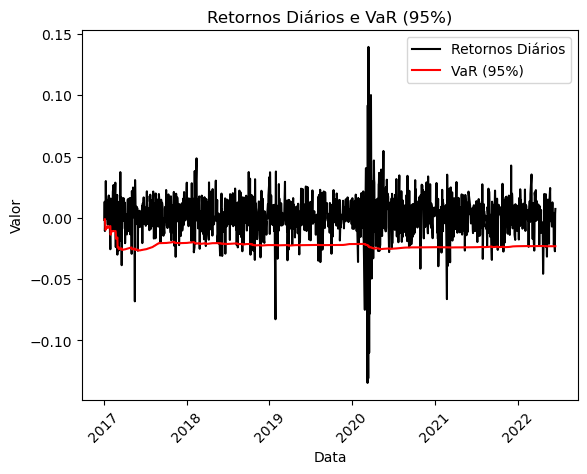

VaR no dia 1000: -2404.3631984110075 USD


In [39]:
training_data.index = pd.to_datetime(training_data.index)  # Certificando que o índice é datetime

# Lista para armazenar os valores de VaR
VaRs = []

# Calculando o VaR para cada dia a partir do dia 1
for i in range(1, len(training_data)):
    VaRs.append(np.percentile(training_data[:i], 5))  # 5% para o VaR de 95%

# Adicionando NaN no início de VaRs para alinhar com o índice de training_data
VaRs = [np.nan] + VaRs  # O primeiro valor de VaR não pode ser calculado, então usamos NaN

# Garantindo que o índice de training_data e VaRs estejam alinhados
# Aqui, adicionamos o NaN no começo de VaRs e usamos o índice correto (dates)
VaRs = pd.Series(VaRs, index=training_data.index)

# Plotando os dados
plt.plot(training_data.index, training_data, color='black', label='Retornos Diários')  # Usando o índice de datas
plt.plot(VaRs.index, VaRs, color='red', label='VaR (95%)')  # Plotando VaR com o índice correto

# Adicionando título e rótulos
plt.title("Retornos Diários e VaR (95%)")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.legend()
plt.xticks(rotation=45)  # Rotacionar as datas para melhorar a legibilidade
plt.show()

# Exemplo: valor de VaR no dia 1000, assumindo que o portfólio tem um valor inicial
portfolio_value = 100000  # Exemplo de valor do portfólio
print("VaR no dia 1000:", VaRs.iloc[1000] * portfolio_value, "USD")

In [40]:
from arch import arch_model

sigma_estimate = arch_model(training_data, p=1, q=1,dist='normal') 
sigma_estimate = sigma_estimate.fit() ## fitting the training data to a GARCH(1,1) model

sigma_estimate.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 296639864.4940406
Iteration:      2,   Func. Count:     18,   Neg. LLF: 9.850608913650482e+17
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3701.5560427442542
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3701.56
Distribution:                  Normal   AIC:                          -7395.11
Method:            Maximum Likelihood   BIC:                          -7374.36
                                        No. Observations:                 1322
Date:                Thu, Mar 13 2025   Df Residuals:                     1321
Time:                        15:43:17   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.2631e-03  3.705e-04      3.409  6.518e-04 [5.369e-04,1.989e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      2.8361e-05  7.384e-07     38.412      0.000 [2.691e-05,2.981e-05]
alpha[1]       0.1000  3.164e-02      3.161  1.573e-03   [3.799e-02,  0.162]
beta[1]        0.8000  1.979e-02     40.421      0.000     [  0.761,  0.839]
============================================================================

Covariance estimator: robust
"""

In [50]:
rolling_forecast = [] #initializing the list 

for i in range(len(training_data)-1):
    train = training_data[:-(len(training_data)-1 - i)] #training data
    model = arch_model(train, p=1, q=1)
    fit = model.fit(disp='off')
    forecast = fit.forecast(horizon=1) #forecasting volatility
    rolling_forecast.append(np.sqrt(forecast.variance.values[-1,:][0])) #appending result to list
    

C:\Users\INTEL\anaconda3\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


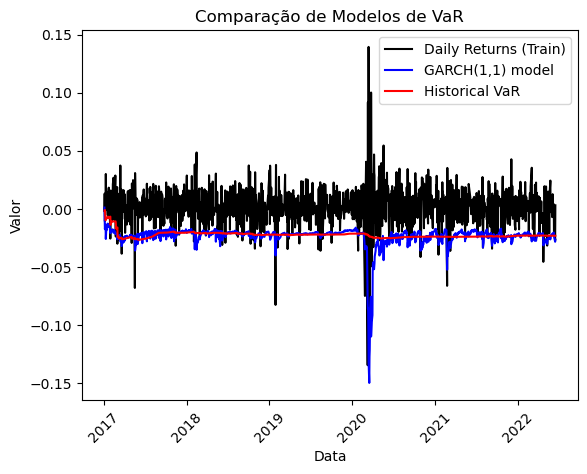

In [55]:
from scipy.stats import norm

VaR_model = np.array(rolling_forecast)*norm.ppf(0.05) + np.mean(training_data) #VaR = sigma*phi^-1 (alpha) + mu if ~ N

# Retirando o último elemento de training_data
training_data = training_data[:-1]

# Garantir que VaR_model tenha o mesmo índice de training_data
VaR_model = pd.Series(VaR_model, index=training_data.index)

# Garantir que VaRs tenha o mesmo índice de training_data
VaRs = pd.Series(VaRs, index=training_data.index)

# Plotando os gráficos
plt.plot(training_data, color='black', label="Daily Returns (Train)")  # Retornos diários
plt.plot(VaR_model, color='blue', label="GARCH(1,1) model")  # Modelo de VaR GARCH(1,1)
plt.plot(VaRs, color='red', label="Historical VaR")  # VaR Histórico
plt.legend()

# Título e rótulos
plt.title("Comparação de Modelos de VaR")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.xticks(rotation=45)  # Rotacionar as datas para melhorar a legibilidade
plt.show()

In [59]:
omega, alpha, beta = sigma_estimate.params[1:4] #GARCH params estimation

sigma_test = np.zeros(len(testing_data)) #initializing the forecasting sigma list

sigma_test[0] = rolling_forecast[-1] #sigma_0 (testing) ~ sigma_T (training)

for i in range(len(sigma_test)-1):
    sigma_test[i+1] = (omega + alpha*testing_data[i]**2 + beta*sigma_test[i]**2)**0.5 #forecasting model (see above)

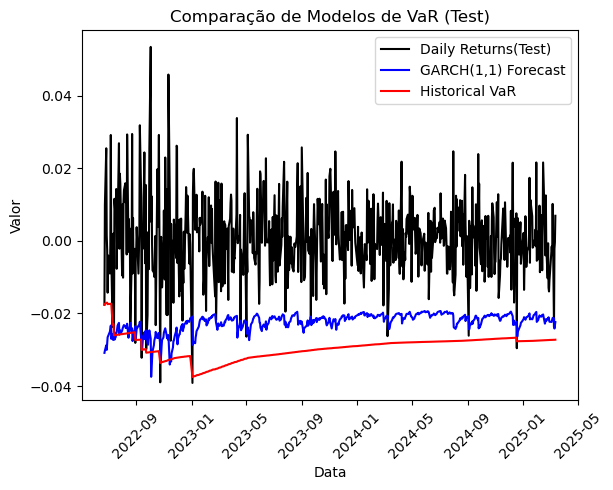

In [65]:
# Recalculando Historical VaRs
HVaRs = []  # Histórico de VaRs
for i in range(1, len(testing_data) + 1):  # Agora o loop vai até len(testing_data)
    HVaRs.append(np.percentile(testing_data[:i], 0.95))  # Recalculando a estimativa de VaR todo dia

# Calculando o VaR Forecast (GARCH(1,1))
VaR_forecast = np.array(sigma_test) * norm.ppf(0.05) + np.mean(testing_data)

# Garantir que VaR_forecast e HVaRs tenham o mesmo comprimento que testing_data
VaR_forecast = VaR_forecast[-len(testing_data):]  # Cortando o VaR_forecast para ter o mesmo comprimento
HVaRs = HVaRs[-len(testing_data):]  # Cortando o HVaRs para ter o mesmo comprimento

# Garantir que VaR_forecast e HVaRs tenham o mesmo índice de testing_data
VaR_forecast = pd.Series(VaR_forecast, index=testing_data.index)
HVaRs = pd.Series(HVaRs, index=testing_data.index)

# Plotando o gráfico
plt.plot(testing_data, color='black', label="Daily Returns(Test)")  # Retornos diários
plt.plot(VaR_forecast, color="blue", label="GARCH(1,1) Forecast")  # Previsão de VaR GARCH(1,1)
plt.plot(HVaRs, color="red", label="Historical VaR")  # VaR Histórico
plt.legend()

# Título e rótulos
plt.title("Comparação de Modelos de VaR (Test)")
plt.xlabel("Data")
plt.ylabel("Valor")
plt.xticks(rotation=45)  # Rotacionar as datas para melhorar a legibilidade
plt.show()

In [62]:
hit_forecast = [1 if testing_data[i] < VaR_forecast[i] else 0 for i in range(len(testing_data))]
hit_historical = [1 if testing_data[i] < HVaRs[i] else 0 for i in range(len(HVaRs))]

print('Number of Forecasted VaR exceedances:', sum(hit_forecast))
print('Number of Historical VaR exceedances: ', sum(hit_historical))

Number of Forecasted VaR exceedances: 14
Number of Historical VaR exceedances:  8


In [63]:
print('Historical Percentage: ', sum(hit_historical)/len(testing_data),"%")
print('Forecasted Percentage: ', sum(hit_forecast)/len(testing_data),"%")

Historical Percentage:  0.012121212121212121 %
Forecasted Percentage:  0.021212121212121213 %


In [ ]:
portfolio_value = 10000 #cash given to asset manager
tickers = ["IBM", "GOOG", "TSLA", "MSFT"] # portfolio
weights = [0.1,0.4,0.35,0.15] #weights

constituent_returns = [get_stock_price(i,start="01-01-2016",end="01-01-2022") for i in tickers] #individual returns 

In [2]:
VaRs = []
for i in range(1,len(training_data)):
    VaRs.append(np.percentile(training_data[:i],0.95)) #Re-calculating VaR estimate everyday

plt.plot(training_data, color='black') #Plotting daily returns 
plt.plot(VaRs[10:],color='red')#Plotting all values of VaR except for when t ɛ (0,10) because it is innaccurate

print("VaR at day 1000:", VaRs[1000]*portfolio_value,"USD")

NameError: name 'training_data' is not defined

### Construindo Modelo de Previsão

Agora que calculamos os dados de VaR, é hora de ajustá-los em um modelo. Fazemos isso ajustando a volatilidade $\sigma$ a um modelo, digamos, GARCH(1,1) e então, sob a suposição de normalidade, calculamos o VaR em cada passo de tempo usando $VaR = \hat{\mu} + \hat{\sigma}\Phi^{-1}(0.05)$.

In [10]:
#Ignore the following code, it just removes the ugly warnings from the code blocks bellow:

############################################################################################
import warnings
warnings.filterwarnings('ignore')
############################################################################################

In [11]:
from arch import arch_model

sigma_estimate = arch_model(training_data, p=1, q=1,dist='normal') 
sigma_estimate = sigma_estimate.fit() ## fitting the training data to a GARCH(1,1) model

sigma_estimate.summary()



Iteration:      1,   Func. Count:      6,   Neg. LLF: 320511574.7638076
Iteration:      2,   Func. Count:     18,   Neg. LLF: 1.6258509358109892e+16
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2862.436387087013
            Iterations: 2
            Function evaluations: 27
            Gradient evaluations: 2


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2862.44
Distribution:                  Normal   AIC:                          -5716.87
Method:            Maximum Likelihood   BIC:                          -5697.22
                                        No. Observations:                 1006
Date:                Thu, Sep 22 2022   Df Residuals:                     1005
Time:                        15:47:56   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0762e-03  3.179e-04      3.385  7.111e-04 [4.531e-04,1.699e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.3887e-06  5.213e-11  8.419e+04      0.000 [4.389e-06,4.389e-06]
alpha[1]       0.0500  1.465e-02      3.414  6.408e-04 [2.129e-02,7.871e-02]
beta[1]        0.9300  1.392e-02     66.830      0.000     [  0.903,  0.957]
============================================================================

Covariance estimator: robust
"""

Olhando para a seção "Volatility Model" na parte inferior do resumo, podemos ver que obtemos os parâmetros estimados estatisticamente significativos como $\omega = 0, \alpha = 0,05, \beta = 0,93$. Vamos agora obter a previsão contínua para os dados de teste para obter um modelo VaR preciso.

In [12]:
rolling_forecast = [] #initializing the list 

for i in range(len(training_data)-1):
    train = training_data[:-(len(training_data)-1 - i)] #training data
    model = arch_model(train, p=1, q=1)
    fit = model.fit(disp='off')
    forecast = fit.forecast(horizon=1) #forecasting volatility
    rolling_forecast.append(np.sqrt(forecast.variance.values[-1,:][0])) #appending result to list
    

/opt/anaconda3/lib/python3.8/site-packages/arch/univariate/base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


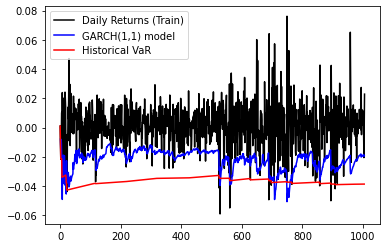

In [13]:
from scipy.stats import norm

VaR_model = np.array(rolling_forecast)*norm.ppf(0.05) + np.mean(training_data) #VaR = sigma*phi^-1 (alpha) + mu if ~ N

plt.plot(training_data, color='black',label="Daily Returns (Train)")
plt.plot(VaR_model,color='blue', label="GARCH(1,1) model")
plt.plot(VaRs,color='red', label="Historical VaR")
plt.legend()

Como você pode ver, conseguimos mapear com sucesso a previsão de volatilidade para um modelo VaR. Nossa tarefa agora é pegar esse modelo e prever o futuro (ou seja, nossa amostra de teste). Nossa tarefa nesse ponto será então fazer um backtest.

### Etapa 4: Aplicando o modelo VaR em dados de teste

Vamos usar os parâmetros GARCH da amostra de treinamento para prever valores futuros de $\hat{\sigma}$, que, de acordo com o modelo, devem ser

$$\hat{\sigma}^2_{t+1} = \omega + \alpha R_t^2 + \beta \hat{\sigma}_t^2$$

onde $R_t$ é o retorno do portfólio no dia $t$.

In [14]:
omega, alpha, beta = sigma_estimate.params[1:4] #GARCH params estimation

sigma_test = np.zeros(len(testing_data)) #initializing the forecasting sigma list

sigma_test[0] = rolling_forecast[-1] #sigma_0 (testing) ~ sigma_T (training)

for i in range(len(sigma_test)-1):
    sigma_test[i+1] = (omega + alpha*testing_data[i]**2 + beta*sigma_test[i]**2)**0.5 #forecasting model (see above)

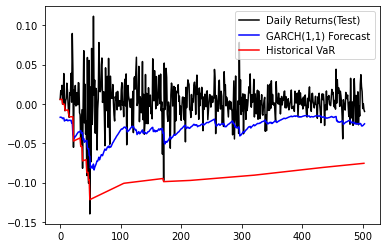

In [15]:
HVaRs = [] #historical VaRs
for i in range(1,len(testing_data)):
    HVaRs.append(np.percentile(testing_data[:i],0.95)) #Re-calculating VaR estimate everyday

VaR_forecast = np.array(sigma_test)*norm.ppf(0.05) + np.mean(testing_data)

plt.plot(testing_data,color='black',label="Daily Returns(Test)")
plt.plot(VaR_forecast, color="blue", label="GARCH(1,1) Forecast")
plt.plot(HVaRs, color="red", label="Historical VaR")
plt.legend()

Como você pode ver na figura, o modelo VaR parece produzir uma estimativa de VaR muito conservadora. Vamos agora fazer um Backtest para descobrir. 

### Backtest do modelo de previsão 

Vamos começar o backtest obtendo a "função hits" (1 se var exceedance 0 caso contrário) para o VaR previsto e histórico.

In [16]:
hit_forecast = [1 if testing_data[i] < VaR_forecast[i] else 0 for i in range(len(testing_data))]
hit_historical = [1 if testing_data[i] < HVaRs[i] else 0 for i in range(len(HVaRs))]

print('Number of Forecasted VaR exceedances:', sum(hit_forecast))
print('Number of Historical VaR exceedances: ', sum(hit_historical))

Number of Forecasted VaR exceedances: 36
Number of Historical VaR exceedances:  9


Há uma discrepância óbvia aqui. Embora lembre-se de que, idealmente, a porcentagem de excedências de VaR $\rightarrow \alpha = 0,05$, que podemos calcular abaixo:

In [17]:
print('Historical Percentage: ', sum(hit_historical)/len(testing_data),"%")
print('Forecasted Percentage: ', sum(hit_forecast)/len(testing_data),"%")

Historical Percentage:  0.017857142857142856 %
Forecasted Percentage:  0.07142857142857142 %


Então, com base neste backtest muito básico, os VaRs previstos realmente parecem fazer um bom trabalho. Eu o encorajo a tentar backtests mais apropriados (Teste Kupeic, backtests simultâneos, etc.) se você quiser resultados mais significativos. 

Além disso, um bom exercício final é pensar sobre por que o modelo previsto parece superar os dados históricos em si, e se isso reflete na força do modelo de alguma forma.